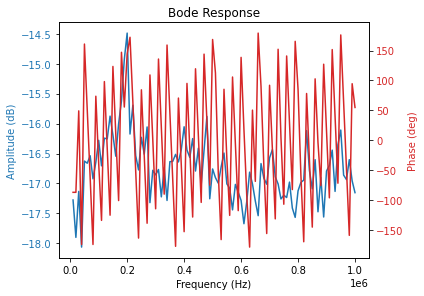

In [6]:
import paramiko
import pandas as pd
import matplotlib.pyplot as plt
import io

# Function to connect to Red Pitaya and run the bode command
def run_bode_command(host, username, password, channel, amplitude, dc_bias, averaging, count_steps, start_freq, stop_freq, scale_type):
    command = f"/opt/redpitaya/bin/bode {channel} {amplitude} {dc_bias} {averaging} {count_steps} {start_freq} {stop_freq} {scale_type}"
    
    # Create an SSH client
    ssh = paramiko.SSHClient()
    ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
    
    # Connect to the Red Pitaya
    ssh.connect(host, username=username, password=password)
    
    # Run the command
    stdin, stdout, stderr = ssh.exec_command(command)
    
    # Read the output
    output = stdout.read().decode()
    
    # Close the connection
    ssh.close()
    
    return output

# Function to parse the output and plot the Bode response
def plot_bode_response(output):
    # Parse the output
    data = io.StringIO(output)
    df = pd.read_csv(data, delim_whitespace=True, names=['Frequency', 'Phase', 'Amplitude'])
    
    # Plot the Bode response
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel('Amplitude (dB)', color='tab:blue')
    ax1.plot(df['Frequency'], df['Amplitude'], color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Phase (deg)', color='tab:red')
    ax2.plot(df['Frequency'], df['Phase'], color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    fig.tight_layout()
    plt.title('Bode Response')
    plt.show()

# Example usage
host = '10.0.0.186'
username = 'root'
password = 'root'
channel = 1
amplitude = 1.0
dc_bias = 0.0
averaging = 1
count_steps = 100
start_freq = 10000
stop_freq = 1000000
scale_type = 'log'

output = run_bode_command(host, username, password, channel, amplitude, dc_bias, averaging, count_steps, start_freq, stop_freq, scale_type)
plot_bode_response(output)

In [7]:
output

'10000.00    -87.32160    -17.27570\n20000.00    -87.32160    -17.90041\n30000.00    49.01760    -17.13250\n40000.00    -174.64320    -18.06285\n50000.00    160.84801    -16.62608\n60000.00    49.01760    -16.66126\n70000.00    -62.19743    -16.53686\n80000.00    -174.64320    -16.92195\n90000.00    73.52640    -16.64489\n100000.00    -38.30400    -16.27896\n110000.00    -134.29439    -16.70505\n120000.00    98.03520    -16.24241\n130000.00    -13.79520    -16.25566\n140000.00    -125.62560    -15.87476\n150000.00    123.36478    -16.19020\n160000.00    10.71360    -16.54393\n170000.00    -101.11680    -16.00301\n180000.00    147.05280    -15.62107\n190000.00    55.46883    -14.92558\n200000.00    144.56288    -14.48756\n210000.00    172.21849    -16.17388\n220000.00    63.93650    -15.69240\n230000.00    -52.09920    -16.53424\n240000.00    -163.92960    -16.77313\n250000.00    84.24000    -16.22931\n260000.00    -26.43909    -16.51014\n270000.00    -139.08757    -16.05564\n280000.00 